In [27]:
# allow for interactive plots in vscode
%matplotlib widget

import soundfile as sf
import numpy as np
import struct
import binascii
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import struct
import scipy as sp
import pandas as pd

# Note: libopus is required for this to work, use available on conda-forge for windows
import opuslib

In [28]:
file_name = 'FRAME1.TXT'

In [29]:
header_bno = b'\xcc\xcc'
last_idx_bno = -1

# Create lists to store indexes
idx_list_bno = []

# Accel lists
x_list_bno = []
y_list_bno = []
z_list_bno = []

yaw_list_bno = []
pitch_list_bno = []
roll_list_bno = []

time_list_bno = []

header_ads = b'\xdd\xdd'
last_idx_ads = -1

# Create lists to store indexes
idx_list_ads = []

ch1_list_ads = []
ch2_list_ads = []
ch3_list_ads = []
ch4_list_ads = []
ch5_list_ads = []
ch6_list_ads = []
ch7_list_ads = []
ch8_list_ads = []

time_list_ads = []

header_max30001 = b'\xee\xee'
last_idx_max30001 = -1

# Create lists to store indexes
idx_list_max30001 = []

ecg_list_max30001 = []
bioz_list_max30001 = []

time_list_max30001 = []
time_list_bioz_max30001 = []

decoder = opuslib.Decoder(12000, 1)

header_t5838 = b'\xaa\xaa'
last_idx_t5838 = -1
pcm_data_t5838 = []
time_list_t5838 = []
idx_list_t5838 = []

header_mlx = b'\xbb\xbb'
last_idx_mlx = -1
temp_a_mlx = []
temp_o_mlx = []
time_list_mlx = []
idx_list_mlx = []

header_max77658 = b'\x88\x88'
last_idx_max77658 = -1
temp_list_max77658 = []
volt_list_max77658 = []
current_list_max77658 = []
soc_list_max77658 = []
time_list_max77658 = []
idx_list_max77658 = []

header_max86178 = b'\x99\x99'
last_idx_max86178 = -1
time_list_max86178 = []
idx_list_max86178 = []
ppg0_list_max86178 = []
ppg1_list_max86178 = []
ppg2_list_max86178 = []
ppg3_list_max86178 = []
ecg_list_max86178 = []
bioz_list_max86178 = []
ppg0_list_time_max86178 = []
ppg1_list_time_max86178 = []
ppg2_list_time_max86178 = []
ppg3_list_time_max86178 = []
ecg_list_time_max86178 = []
bioz_list_time_max86178 = []

max86178_OF_cnt = 0

In [30]:
with open(file_name, "rb") as f:
  while True :
    # Read header
    head = f.read(2)

    # Check if header is empty
    if(head == b''):
      break

    # Check if header is valid
    if head != header_bno and head != header_ads and head != header_max30001 and head != header_t5838 and head != header_mlx and head != header_max77658 and head != header_max86178:
      print(f.tell())
      print(head)
      break

    # Read data bno
    if head == header_bno:
      seconds = int.from_bytes(f.read(4), "little")
      millisec = int.from_bytes(f.read(2), "little")
      timestamp = seconds + millisec / 1000.0
      len_ = int.from_bytes(f.read(1), "little")
      for i in range(10):
        idx = int.from_bytes(f.read(1), "little")

        # Check if index is valid
        if((last_idx_bno+1)%256 != idx and last_idx_bno > 0):
          print("error idx bno")
          print(idx)
          print(f.tell())
          
        last_idx_bno = idx
        idx_list_bno.append(idx)  # Append index to list
        time_list_bno.append(timestamp-0.09+0.01*i)
        yaw = int.from_bytes(f.read(2), "little", signed=True)
        pitch = int.from_bytes(f.read(2), "little", signed=True)
        roll = int.from_bytes(f.read(2), "little", signed=True)
        x_accel = int.from_bytes(f.read(2), "little", signed=True)
        y_accel = int.from_bytes(f.read(2), "little", signed=True)
        z_accel = int.from_bytes(f.read(2), "little", signed=True)
        x_list_bno.append(x_accel)
        y_list_bno.append(y_accel)
        z_list_bno.append(z_accel)
        yaw_list_bno.append(yaw)
        pitch_list_bno.append(pitch)
        roll_list_bno.append(roll)

    # Read data ads
    if head == header_ads:
      seconds = int.from_bytes(f.read(4), "little")
      millisec = int.from_bytes(f.read(2), "little")
      timestamp = seconds + millisec / 1000.0
      len_ = int.from_bytes(f.read(1), "little")
      idx = int.from_bytes(f.read(1), "little")

      # Check if index is valid
      if((last_idx_ads+1)%256 != idx and last_idx_ads > 0):
        print("error idx ads")
        print(idx)
        print(f.tell())

      last_idx_ads = idx
      idx_list_ads.append(idx)
      time_list_ads.append(timestamp)

      v_ref=4
      bits=24
      res=2*v_ref/((2**bits)-1)
      Gain=12

      ch1 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch2 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch3 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch4 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch5 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch6 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch7 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch8 = int.from_bytes(f.read(3), "big", signed=True)*res/Gain
      ch1_list_ads.append(ch1)
      ch2_list_ads.append(ch2)
      ch3_list_ads.append(ch3)
      ch4_list_ads.append(ch4)
      ch5_list_ads.append(ch5)
      ch6_list_ads.append(ch6)
      ch7_list_ads.append(ch7)
      ch8_list_ads.append(ch8)

    # Read data max30001
    if head == header_max30001:
      seconds = int.from_bytes(f.read(4), "little")
      millisec = int.from_bytes(f.read(2), "little")
      timestamp = seconds + millisec / 1000.0
      len_ = int.from_bytes(f.read(1), "little")
      idx = int.from_bytes(f.read(1), "little")

      # Check if index is valid
      if((last_idx_max30001+1)%256 != idx and last_idx_max30001 > 0):
        print("error idx max30001")
        print(idx)
        print(f.tell())

      last_idx_max30001 = idx
      idx_list_max30001.append(idx)
      time_list_max30001.append(timestamp)
      raw_data = f.read(3)
      data_signed = int.from_bytes(raw_data, "big", signed=True)
      shifted_data = (data_signed >> 6)
      ecg_list_max30001.append(shifted_data)
      raw_data = f.read(3)
      data_signed = int.from_bytes(raw_data, "big", signed=True)

      # Check if data is present for bioz
      if data_signed != 0x000006:
        shifted_data = (data_signed >> 4)
        bioz_list_max30001.append(shifted_data)
        time_list_bioz_max30001.append(timestamp)

    # Read data t5838  
    if head == header_t5838:
      seconds = int.from_bytes(f.read(4), "little")
      millisec = int.from_bytes(f.read(2), "little")
      timestamp = seconds + millisec / 1000.0
      len_ = int.from_bytes(f.read(1), "little")
      idx = int.from_bytes(f.read(1), "little")

      # Check if index is valid
      if((last_idx_t5838+1)%256 != idx and last_idx_t5838 > 0):
        print("error idx t5838")
        print(idx)
        print(f.tell())

      last_idx_t5838 = idx
      idx_list_t5838.append(idx)
      time_list_t5838.append(timestamp)
      frame = f.read(len_-1)

      # Decode opus frame
      pcm = decoder.decode(frame, 480)
      pcm_data_t5838.append(pcm)

    # Read data mlx
    if head == header_mlx:
      seconds = int.from_bytes(f.read(4), "little")
      millisec = int.from_bytes(f.read(2), "little")
      timestamp = seconds + millisec / 1000.0
      len_ = int.from_bytes(f.read(1), "little")
      idx = int.from_bytes(f.read(1), "little")

      # Check if index is valid
      if((last_idx_mlx+1)%256 != idx and last_idx_mlx > 0):
        print("error idx mlx")
        print(idx)
        print(f.tell())

      last_idx_mlx = idx
      idx_list_mlx.append(idx)
      time_list_mlx.append(timestamp)
      ambient_t_bytes = f.read(4)
      ambient_t = struct.unpack('f', ambient_t_bytes)[0]
      object_t_bytes = f.read(4)
      object_t = struct.unpack('f', object_t_bytes)[0]
      temp_a_mlx.append(ambient_t)
      temp_o_mlx.append(object_t)

    # Read data max77658
    if head == header_max77658:
      seconds = int.from_bytes(f.read(4), "little")
      millisec = int.from_bytes(f.read(2), "little")
      timestamp = seconds + millisec / 1000.0
      len_ = int.from_bytes(f.read(1), "little")
      idx = int.from_bytes(f.read(1), "little")

      # Check if index is valid
      if((last_idx_max77658+1)%256 != idx and last_idx_max77658 > 0):
        print("error idx max77658")
        print(idx)
        print(f.tell())

      last_idx_max77658 = idx
      idx_list_max77658.append(idx)
      time_list_max77658.append(timestamp)
      temp = int.from_bytes(f.read(2), "little")/255
      temp_list_max77658.append(temp)
      volt = int.from_bytes(f.read(2), "little")
      volt_list_max77658.append(volt)
      current = int.from_bytes(f.read(2), "little")
      current_list_max77658.append(current)
      soc = int.from_bytes(f.read(2), "little")
      soc_list_max77658.append(soc)

    # Read data max86178
    if head == header_max86178:
      seconds = int.from_bytes(f.read(4), "little")
      millisec = int.from_bytes(f.read(2), "little")
      timestamp = seconds + millisec / 1000.0
      len_ = int.from_bytes(f.read(1), "little")
      idx = int.from_bytes(f.read(1), "little")

      # Check if index is valid
      if((last_idx_max86178+1)%256 != idx and last_idx_max86178 > 0):
        print("error idx max86178")
        print(idx)
        print(f.tell())

      last_idx_max86178 = idx
      idx_list_max86178.append(idx)
      time_list_max86178.append(timestamp)
      for i in range(50) :
        meas = f.read(3)
        if len(meas) < 3:
          break
        first_byte = meas[0]
        first_4_bits = first_byte >> 4
        if first_4_bits == 0xF:
          pass
        if first_4_bits == 0x0:
          ppg0_list_max86178.append((int.from_bytes(meas, "big") & ((1 << 20) - 1)) - ((int.from_bytes(meas, "big") & (1 << 19)) << 1))
          ppg0_list_time_max86178.append(timestamp)
        if first_4_bits == 0x1:
          ppg1_list_max86178.append((int.from_bytes(meas, "big") & ((1 << 20) - 1)) - ((int.from_bytes(meas, "big") & (1 << 19)) << 1))
          ppg1_list_time_max86178.append(timestamp)
        if first_4_bits == 0x2:
          ppg2_list_max86178.append((int.from_bytes(meas, "big") & ((1 << 20) - 1)) - ((int.from_bytes(meas, "big") & (1 << 19)) << 1))
          ppg2_list_time_max86178.append(timestamp)
        if first_4_bits == 0x3:
          ppg3_list_max86178.append((int.from_bytes(meas, "big") & ((1 << 20) - 1)) - ((int.from_bytes(meas, "big") & (1 << 19)) << 1))
          ppg3_list_time_max86178.append(timestamp)
        if first_4_bits == 0x9:
          bioz_list_max86178.append((int.from_bytes(meas, "big") & ((1 << 20) - 1)) - ((int.from_bytes(meas, "big") & (1 << 19)) << 1))
          bioz_list_time_max86178.append(timestamp)
        if first_4_bits == 0xb:
          ecg_list_max86178.append((int.from_bytes(meas, "big") & ((1 << 18) - 1)) - ((int.from_bytes(meas, "big") & (1 << 17)) << 1))
          ecg_list_time_max86178.append(timestamp)
        if first_4_bits == 0xe:
          pass
        if first_4_bits == 0x7 or first_4_bits == 0x8:
          # ppg1_list_max86178.append((int.from_bytes(meas, "big") & ((1 << 20) - 1)) - ((int.from_bytes(meas, "big") & (1 << 19)) << 1))
          max86178_OF_cnt += 1
print("Overflows: ", max86178_OF_cnt)

Overflows:  2043


### Mesaurement plots

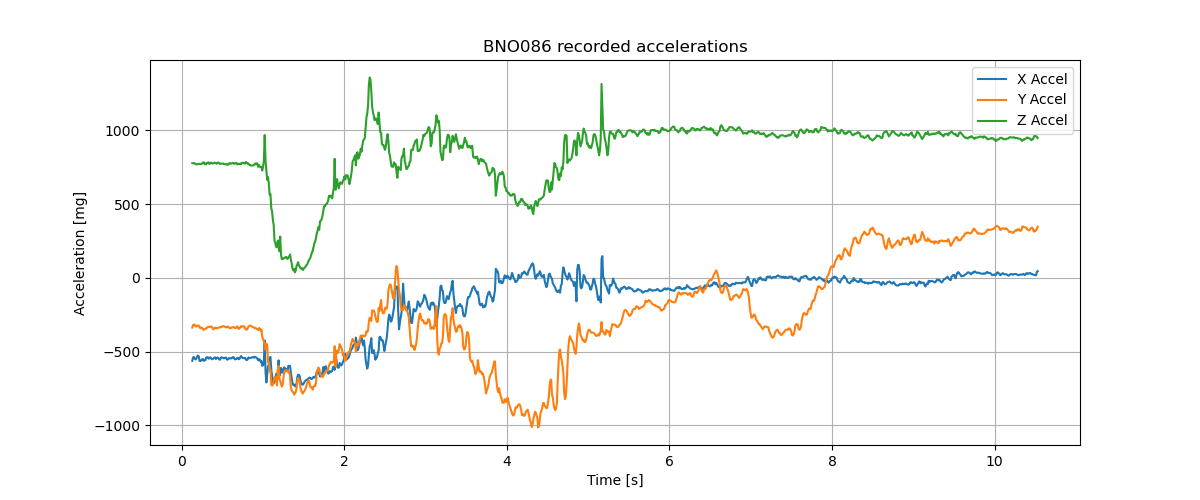

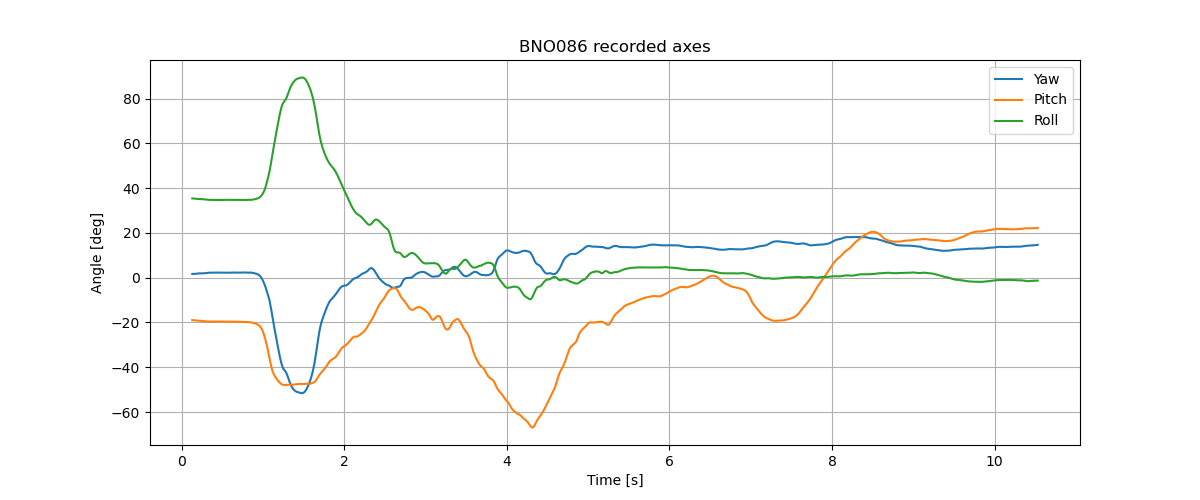

In [31]:
## Plot BNO086 data

# Create a new figure
plt.figure(figsize=(12, 5))

# Plot x acceleration
plt.plot(time_list_bno, x_list_bno, label='X Accel')

# Plot y acceleration
plt.plot(time_list_bno, y_list_bno, label='Y Accel')

# Plot z acceleration
plt.plot(time_list_bno, z_list_bno, label='Z Accel')

# Add a legend
plt.legend()

plt.title("BNO086 recorded accelerations")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [mg]")

plt.grid()

plt.ion()

# Show the plot
plt.show()


# Create a new figure
plt.figure(figsize=(12, 5))

# Plot x acceleration
plt.plot(time_list_bno, np.array(yaw_list_bno)/100, label='Yaw')

# Plot y acceleration
plt.plot(time_list_bno, np.array(pitch_list_bno)/100, label='Pitch')

# Plot z acceleration
plt.plot(time_list_bno, np.array(roll_list_bno)/100, label='Roll')

# Add a legend
plt.legend()

plt.title("BNO086 recorded axes")
plt.xlabel("Time [s]")
plt.ylabel("Angle [deg]")

plt.grid()

plt.ion()

# Show the plot
plt.show()

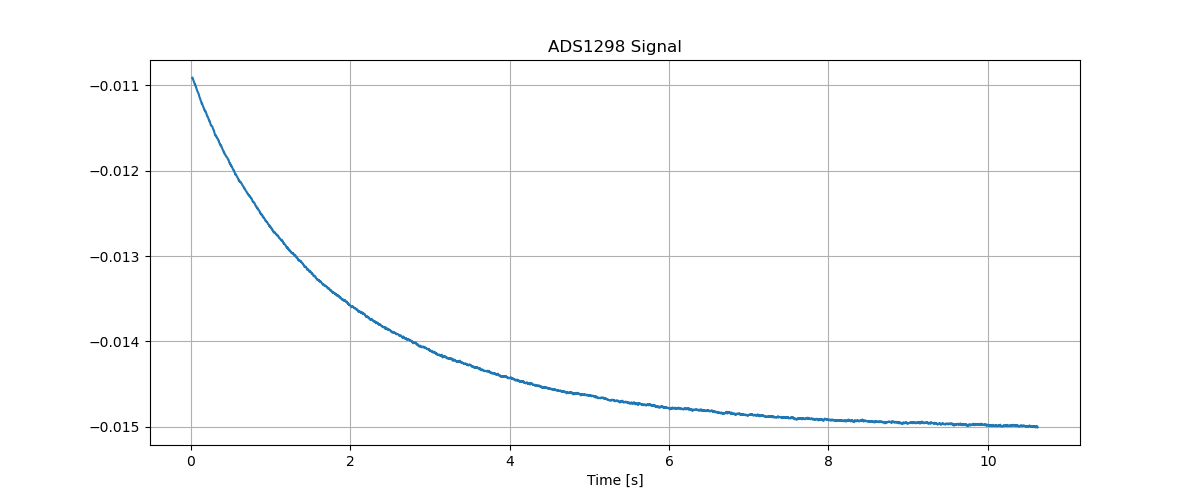

In [32]:
## Plot ADS1298 data

# Create a new figure
plt.figure(figsize=(12, 5))

# Plot channel 1
plt.plot(time_list_ads[1:], ch1_list_ads[1:])

plt.title("ADS1298 Signal")
plt.xlabel("Time [s]")

plt.grid()

# Show the plot
plt.show()

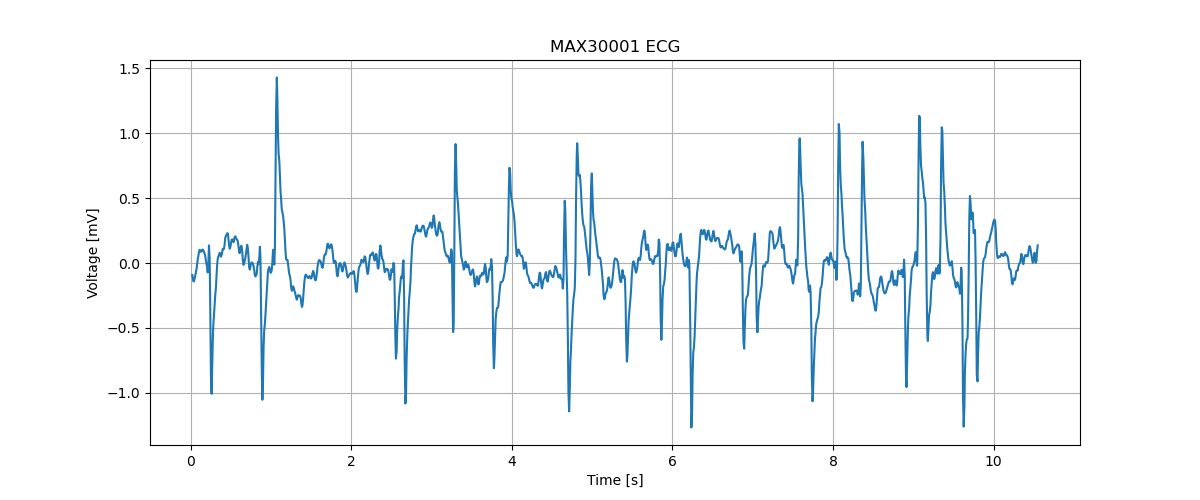

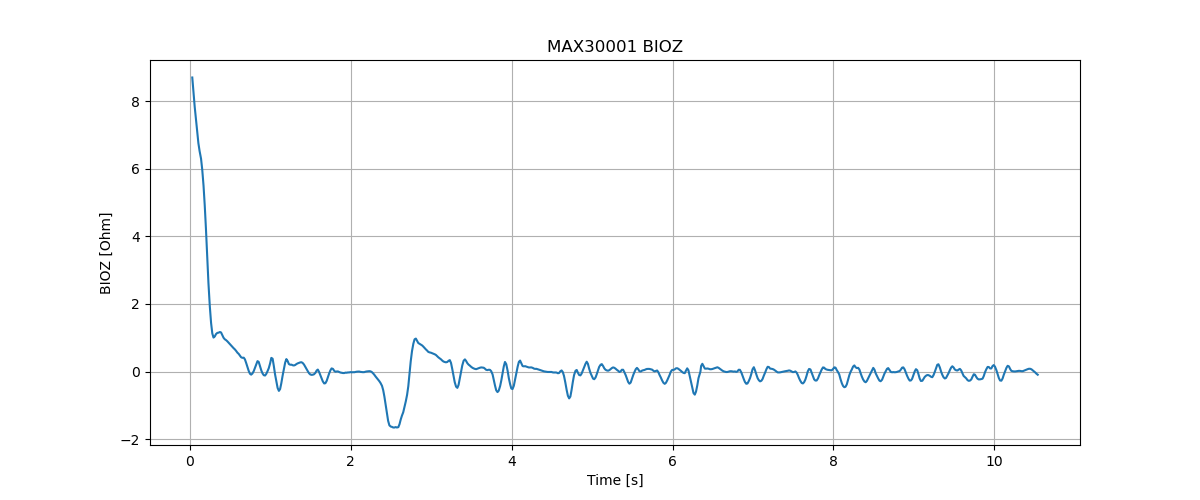

In [33]:
# Create a new figure
plt.figure(figsize=(12, 5))

# Plot ecg signal
plt.plot(time_list_max30001, np.array(ecg_list_max30001)*(1000/80/pow(2,17)))

plt.title("MAX30001 ECG")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [mV]")

plt.grid()

# Show the plot
plt.show()

# Create a new figure
plt.figure(figsize=(12, 5))

time_list_bioz_max30001 = np.array(time_list_bioz_max30001)
bioz_list_max30001 = np.array(bioz_list_max30001)

# Now plot the filtered data
plt.plot(time_list_bioz_max30001, bioz_list_max30001 * (1 / 20 / 48 * 1000000 / pow(2, 19)))

plt.title("MAX30001 BIOZ")
plt.xlabel("Time [s]")
plt.ylabel("BIOZ [Ohm]")

plt.grid()

# Show the plot
plt.show()

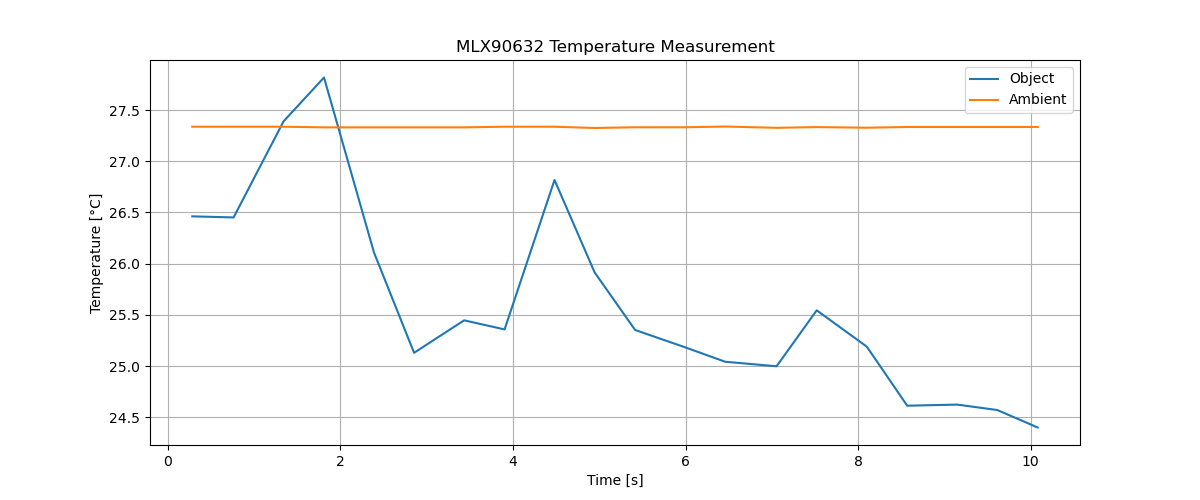

In [34]:
## Plot MLX90632 data

# Create a new figure
plt.figure(figsize=(12, 5))

# Plot ambient and object temperature
plt.plot(time_list_mlx, temp_o_mlx, label='Object')
plt.plot(time_list_mlx, temp_a_mlx, label='Ambient')

plt.title("MLX90632 Temperature Measurement")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [°C]")

plt.grid()

# Add a legend
plt.legend()

# Show the plot
plt.show()

126720


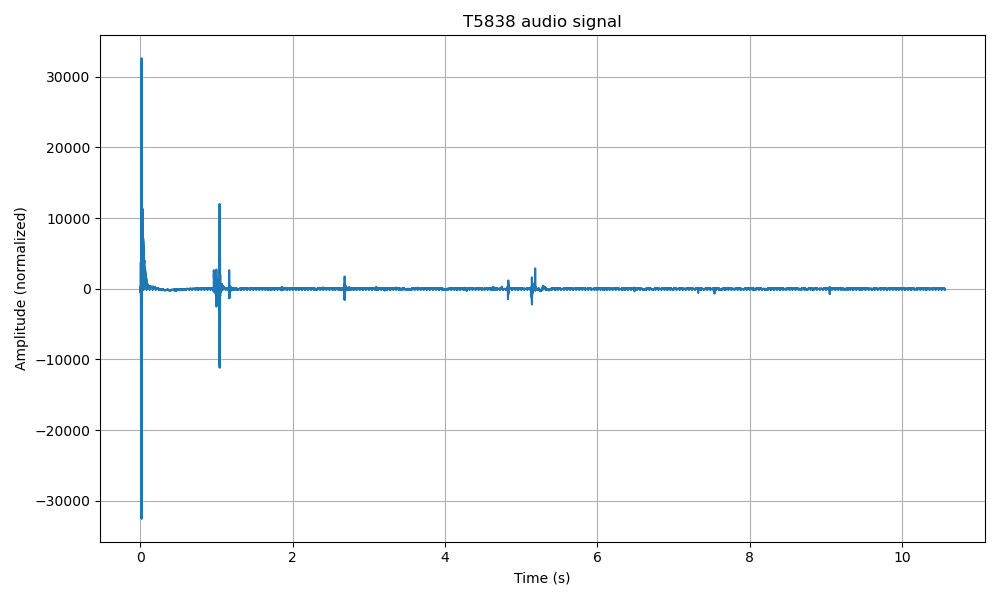

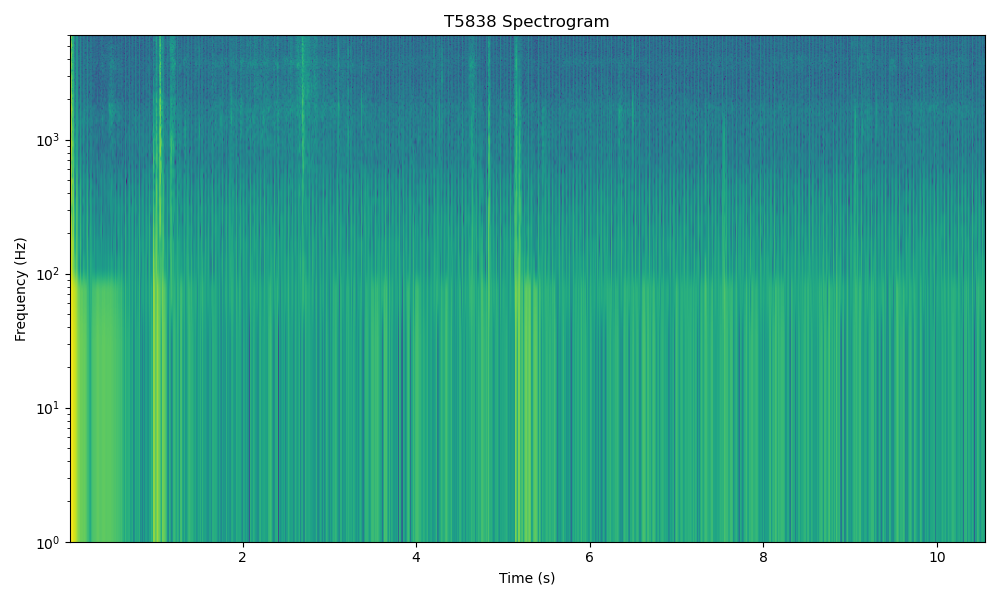

In [35]:
## Plot T5838 data

pcm_data_bytes = b''.join(pcm_data_t5838)
pcm_array = np.frombuffer(pcm_data_bytes, dtype=np.int16)
pcm_array = pcm_array * 2
print(np.size(pcm_array))

sf.write('output.wav', pcm_array, 12000)

sample_rate_micro, data_micro = wavfile.read('output.wav')

# Select one channel for stereo audio
if data_micro.ndim > 1:
    data_micro = data_micro[:, 0]

max_freq = 6000

plt.figure(figsize=(10, 6))

plt.plot(np.arange(len(data_micro)) / sample_rate_micro, data_micro)
plt.title('T5838 audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (normalized)')
plt.grid()

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

plt.specgram(data_micro, Fs=sample_rate_micro)
plt.title('T5838 Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(1, max_freq)  # avoid log(0)
plt.yscale('log')

plt.tight_layout()
plt.show()

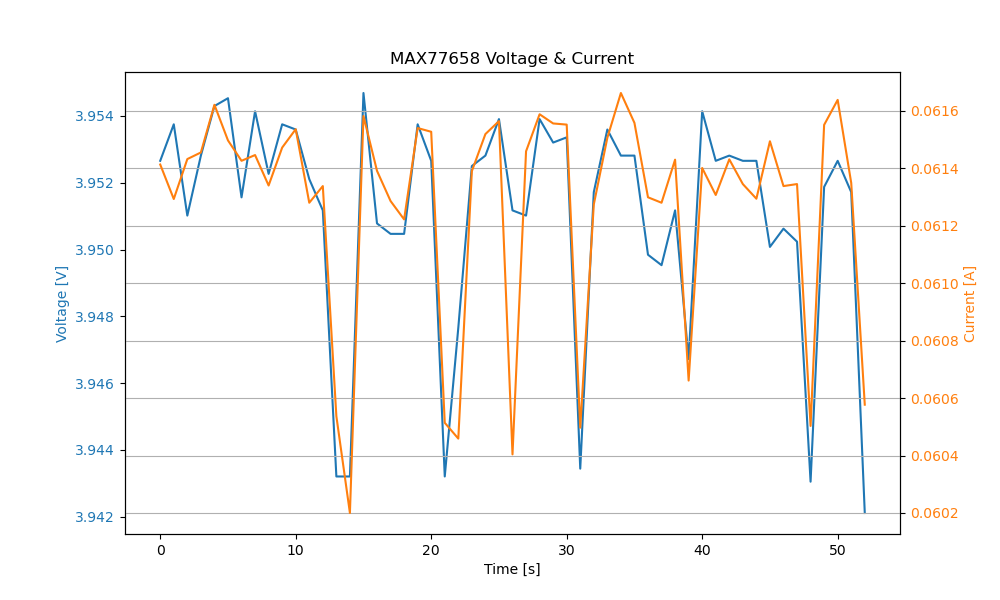

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting voltage data on the left y-axis
ax1.plot(np.array(volt_list_max77658)*78.125/1000000, color='tab:blue', label='Voltage')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for current data on the right
ax2 = ax1.twinx()
ax2.plot(np.array(current_list_max77658)/1000000, color='tab:orange', label='Current')
ax2.set_ylabel('Current [A]', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("MAX77658 Voltage & Current")
plt.grid()
plt.show()

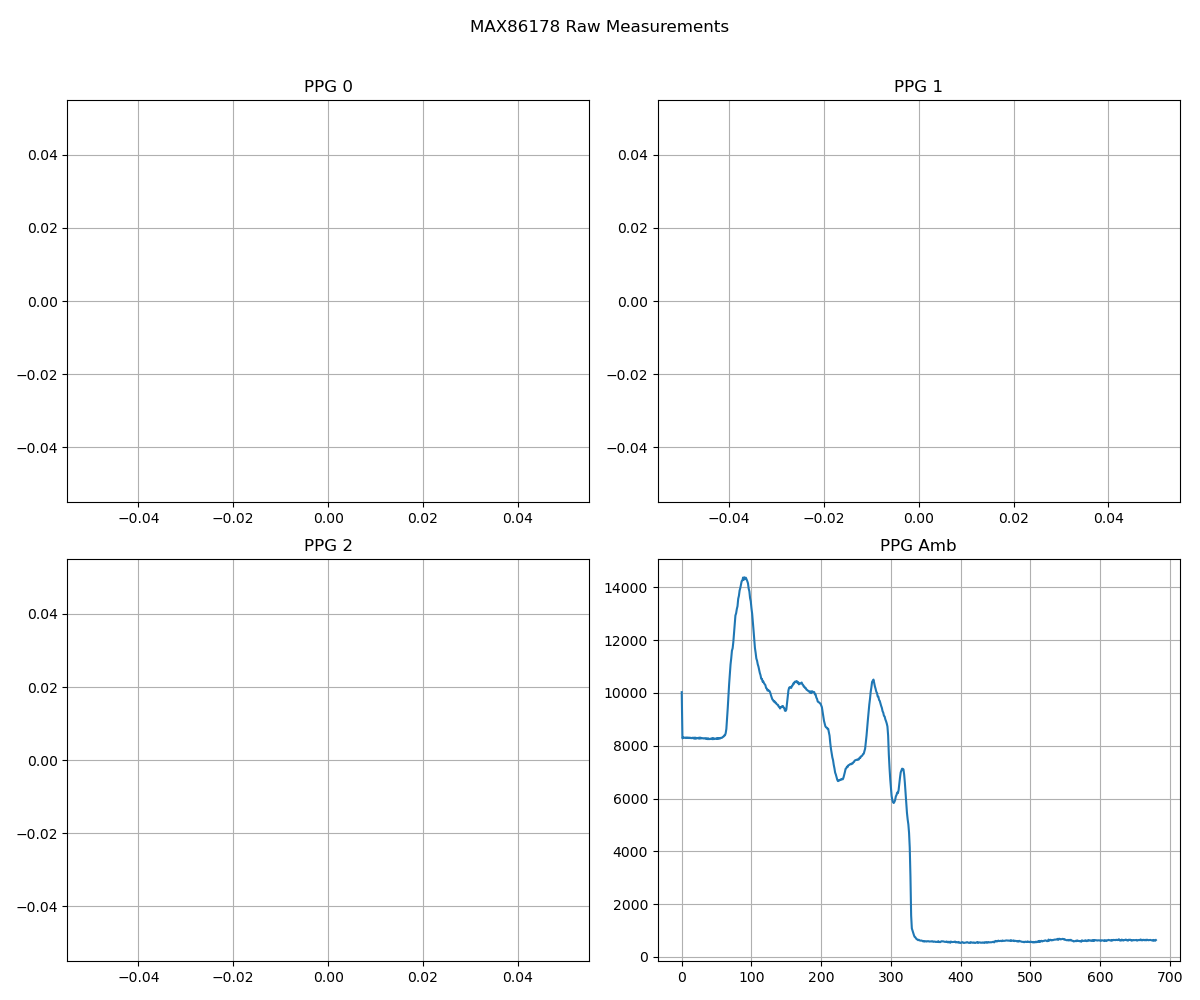

In [37]:
## Plot MAX86178 data

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(ppg0_list_max86178)
axs[0, 0].set_title('PPG 0')
axs[0, 1].plot(ppg1_list_max86178)
axs[0, 1].set_title('PPG 1')
axs[1, 0].plot(ppg2_list_max86178)
axs[1, 0].set_title('PPG 2')
axs[1, 1].plot(ppg3_list_max86178)
axs[1, 1].set_title('PPG Amb')

for ax in axs.flat:
    ax.grid(True)

fig.suptitle('MAX86178 Raw Measurements')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

C:\Users\benji\AppData\Local\Temp\ipykernel_17188\877043397.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


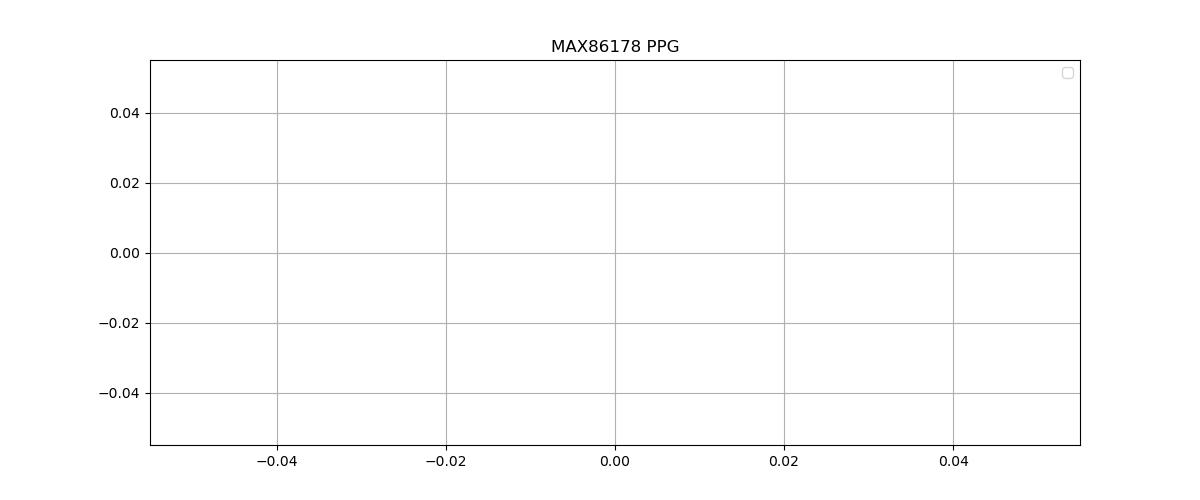

In [38]:
## Plot MLX90632 data

# Create a new figure
plt.figure(figsize=(12, 5))

# Plot ambient and object temperature
plt.plot(ppg1_list_max86178)

plt.title("MAX86178 PPG")

plt.grid()

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Save to csv

In [39]:
csv_file_name = '6ma_data.csv'

# Create a dictionary with the PPG lists
data = {
    'BNO_x_accel': x_list_bno, 'BNO_y_accel': y_list_bno, 'BNO_z_accel': z_list_bno,
    'BNO_yaw': yaw_list_bno, 'BNO_pitch': pitch_list_bno, 'BNO_roll': roll_list_bno, 'BNO_time': time_list_bno,
    'ADS_ch1': ch1_list_ads, 'ADS_ch2': ch2_list_ads, 'ADS_ch3': ch3_list_ads, 'ADS_ch4': ch4_list_ads,
    'ADS_ch5': ch5_list_ads, 'ADS_ch6': ch6_list_ads, 'ADS_ch7': ch7_list_ads, 'ADS_ch8': ch8_list_ads, 'ADS_time': time_list_ads,
    'MAX30001_ecg': ecg_list_max30001, 'MAX30001_bioz': bioz_list_max30001, 'MAX30001_time': time_list_max30001,
    'T5838_pcm': pcm_data_t5838, 'T5838_time': time_list_t5838,
    'MLX_temp_a': temp_a_mlx, 'MLX_temp_o': temp_o_mlx, 'MLX_time': time_list_mlx,
    'MAX77658_temp': temp_list_max77658, 'MAX77658_volt': volt_list_max77658, 'MAX77658_current': current_list_max77658,
    'MAX77658_soc': soc_list_max77658, 'MAX77658_time': time_list_max77658,
    'MAX86178_ppg0': ppg0_list_max86178, 'MAX86178_ppg1': ppg1_list_max86178, 'MAX86178_ppg2': ppg2_list_max86178,
    'MAX86178_ppg3': ppg3_list_max86178, 'MAX86178_ecg': ecg_list_max86178, 'MAX86178_bioz': bioz_list_max86178,
    'MAX86178_ppg0_time': ppg0_list_time_max86178, 'MAX86178_ppg1_time': ppg1_list_time_max86178,
    'MAX86178_ppg2_time': ppg2_list_time_max86178, 'MAX86178_ppg3_time': ppg3_list_time_max86178,
    'MAX86178_ecg_time': ecg_list_time_max86178, 'MAX86178_bioz_time': bioz_list_time_max86178
}

# Create a DataFrame with the PPG lists, handling different sizes
df_ppg = pd.DataFrame.from_dict(data, orient='index').transpose()

# Export the DataFrame to a CSV file
df_ppg.to_csv(csv_file_name, index=False)